In [37]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from newsapi import NewsApiClient
from datetime import datetime, timedelta
import numpy as np
from numpy.random import seed
seed(1)
import requests
from tensorflow import random
random.set_seed(2)
#import nltk as nltk
#nltk.download('vader_lexicon')
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#analyzer = SentimentIntensityAnalyzer()
#from nltk.corpus import stopwords, reuters
import hvplot.pandas
%matplotlib inline

In [38]:
load_dotenv()

True

In [39]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
#print(alpaca_api_key)

In [40]:
api_key = os.getenv("news_api")
#print(api_key)

In [41]:
newsapi = NewsApiClient(api_key=api_key)

In [42]:
#15Min interval
timeframe = "1D"
start_date = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-12-31", tz="America/New_York").isoformat()
#today = pd.Timestamp("2021-01-02", tz="America/New_York").isoformat()
ticker = ["SPY", "DIA", "QQQ", "AAPL", "GOOGL", "JNJ"]
nasdaq_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
nasdaq_ticker.dropna(inplace=True)
nasdaq_ticker.head(5)
#apple_ticker.dropna(inplace=True)

AAPL                                        \
                             open      high     low     close    volume   
time                                                                      
2019-01-02 00:00:00-05:00  154.89  158.8500  154.23  157.5225  27803621   
2019-01-03 00:00:00-05:00  143.98  145.7200  142.00  142.2900  82418448   
2019-01-04 00:00:00-05:00  144.53  148.5499  143.80  148.1200  51267225   
2019-01-07 00:00:00-05:00  148.70  148.8300  145.90  147.9100  49982480   
2019-01-08 00:00:00-05:00  149.56  151.8200  148.52  150.6300  36592406   

                              DIA                                      ...  \
                             open    high      low     close   volume  ...   
time                                                                   ...   
2019-01-02 00:00:00-05:00  229.27  234.00  229.140  232.9800  4949729  ...   
2019-01-03 00:00:00-05:00  231.25  231.42  226.621  227.1900  6864028  ...   
2019-01-04 00:00:00-05:00  230.00  235.18  229.730  234.2401  6976907  ...   
2019-01-07 00:00:00-05:00  234.84  236.88  232.951  235.3900  3873356  ...   
2019-01-08 00:00:00-05:00  237.94  238.66  235.790  237.8300  4074132  ...   

                              QQQ                                         SPY  \
                             open    high     low     close    volume    open   
time                                                                            
2019-01-02 00:00:00-05:00  150.99  155.75  150.88  154.6799  48312136  245.98   
2019-01-03 00:00:00-05:00  152.60  153.26  149.73  149.9100  65578032  248.23   
2019-01-04 00:00:00-05:00  152.18  157.00  151.74  156.3114  61765071  247.59   
2019-01-07 00:00:00-05:00  156.54  158.86  156.11  158.1300  45376168  252.69   
2019-01-08 00:00:00-05:00  159.56  160.11  157.20  159.5200  44064960  256.82   

                                                              
                             high     low   close     volume  
time                                                          
2019-01-02 00:00:00-05:00  251.21  245.95  249.89  107236613  
2019-01-03 00:00:00-05:00  248.57  244.03  244.46  113782919  
2019-01-04 00:00:00-05:00  253.11  247.17  252.41  122528832  
2019-01-07 00:00:00-05:00  255.95  251.69  254.40   88317608  
2019-01-08 00:00:00-05:00  257.31  254.00  256.65   88864452  

[5 rows x 30 columns]

In [43]:
tech_df = pd.DataFrame()
tech_df["S&P500"] = nasdaq_ticker["SPY"]["close"]
tech_df["DOW"] = nasdaq_ticker["DIA"]["close"]
tech_df["NASDAQ"] = nasdaq_ticker["QQQ"]["close"]
tech_df["Apple"] = nasdaq_ticker["AAPL"]["close"]
tech_df["Google"] = nasdaq_ticker["GOOGL"]["close"]
tech_df["Johnson&Johnson"] = nasdaq_ticker["JNJ"]["close"]
#apple_df = apple_df.pct_change().dropna()
tech_df.index = tech_df.index.date 
tech_df.dropna(inplace=True)
tech_df.head()

,S&P500,DOW,NASDAQ,Apple,Google,Johnson&Johnson
2019-01-02,249.89,232.9800,154.6799,157.5225,1053.240,127.680
2019-01-03,244.46,227.1900,149.9100,142.2900,1026.505,126.214
2019-01-04,252.41,234.2401,156.3114,148.1200,1076.550,127.830
2019-01-07,254.40,235.3900,158.1300,147.9100,1076.010,127.140
2019-01-08,256.65,237.8300,159.5200,150.6300,1085.510,129.850


In [44]:
tech_returns = tech_df.pct_change().dropna()
tech_returns.head()

,S&P500,DOW,NASDAQ,Apple,Google,Johnson&Johnson
2019-01-03,-0.021730,-0.024852,-0.030837,-0.096700,-0.025384,-0.011482
2019-01-04,0.032521,0.031032,0.042702,0.040973,0.048753,0.012804
2019-01-07,0.007884,0.004909,0.011634,-0.001418,-0.000502,-0.005398
2019-01-08,0.008844,0.010366,0.008790,0.018390,0.008829,0.021315
2019-01-09,0.004130,0.003574,0.007397,0.018190,-0.002110,-0.007470


In [45]:
csv_path = Path("../csvs/Book1.csv/")
oil_data = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
oil_data.sort_index(ascending = True, inplace = True)
oil_data.head()

,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [46]:
oil = pd.DataFrame()
oil["DPB"] = oil_data["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"]

In [47]:
oil.head()

,DPB
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [48]:
csv_path = Path("../csvs/covid_cases.csv/")
covid_data = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
covid_data.sort_index(ascending = True, inplace = True)
covid_data.tail()

,New Cases,7-Day Moving Avg,Historic Cases
Date,,,
2021-06-28,8669,12295,44
2021-06-29,14823,12504,122
2021-06-30,14353,12528,810
2021-07-01,17911,12914,472
2021-07-02,15555,13241,391


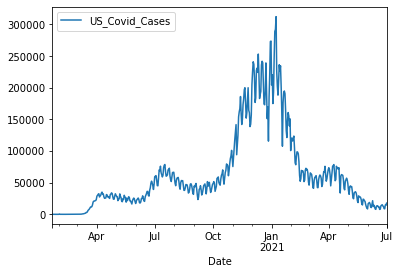

In [49]:
covid_df = pd.DataFrame()
covid_df["US_Covid_Cases"] = covid_data["New Cases"]
#covid_df["Date"] = covid_data["Date"]
covid_df.plot()

In [50]:
df = tech_df.join(oil, how="inner")
df.head()

,S&P500,DOW,NASDAQ,Apple,Google,Johnson&Johnson,DPB
2019-01-02,249.89,232.9800,154.6799,157.5225,1053.240,127.680,46.31
2019-01-03,244.46,227.1900,149.9100,142.2900,1026.505,126.214,46.92
2019-01-04,252.41,234.2401,156.3114,148.1200,1076.550,127.830,47.76
2019-01-07,254.40,235.3900,158.1300,147.9100,1076.010,127.140,48.27
2019-01-08,256.65,237.8300,159.5200,150.6300,1085.510,129.850,49.58


In [51]:
csv_path = Path("../csvs/vaccines.csv/")
vaccine_data = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
vaccine_data.sort_index(ascending = True, inplace = True)
vaccine_data.head()

,Date Type,Program,Total Doses Administered Daily,Daily Count People Receiving Dose 1,Daily Count People Receiving Dose 2,Total Doses Administered Cumulative,People Receiving 1 or More Doses Cumulative,People Receiving 2 Doses Cumulative,7-Day Avg Daily Count Dose 1,7-Day Avg Total Doses Daily,7-Day Avg Daily Count Dose 2,Daily Count of People Fully Vaccinated,People with at least One Dose Cumulative,People Fully Vaccinated Cumulative,7-Day Avg Daily Count of People Fully Vaccinated
Date,,,,,,,,,,,,,,,
2020-12-13,Admin,US,13564,12038,1355,13564,12038,1355,12038,13564,1355,1543,12038,1543,1543
2020-12-14,Admin,US,4008,3874,7,17572,15912,1362,7956,8786,681,39,15912,1582,791
2020-12-15,Admin,US,50362,46873,32,67934,62785,1394,20928,22644,465,93,62785,1675,558
2020-12-16,Admin,US,160987,153951,220,228921,216736,1614,54184,57230,404,280,216736,1955,488
2020-12-17,Admin,US,275939,264464,570,504860,481200,2184,96240,100972,437,615,481200,2570,514


In [52]:
#vaccine_df = pd.DataFrame()
##accine_df["Daily_Dose"] = vaccine_data["Total Doses Administered Daily"]
#covid_df["Date"] = covid_data["Date"]
#vaccine_df.plot()

In [53]:
data = covid_df.join(df, how="inner")
#data = vaccine_df.join(data, how="inner")
#data = data.join(vaccine_df, how="inner")
data.sort_index(inplace=True)
data.tail(100)

,US_Covid_Cases,S&P500,DOW,NASDAQ,Apple,Google,Johnson&Johnson,DPB
2021-02-04,120127,386.17,310.6499,330.30,137.4000,2055.27,161.990,56.19
2021-02-05,123661,387.68,311.5000,331.40,136.7700,2089.50,164.480,56.80
2021-02-08,78347,390.53,313.8200,333.59,136.9007,2084.52,164.910,57.95
2021-02-09,91717,390.25,313.9100,333.48,136.0000,2073.90,166.210,58.34
2021-02-10,98836,390.10,314.5500,332.73,135.3600,2086.53,166.840,58.69
...,...,...,...,...,...,...,...,...
2021-06-22,13361,423.06,339.4900,347.52,133.9700,2446.61,163.675,73.15
2021-06-23,14188,422.60,338.7400,347.66,133.7000,2442.55,162.630,73.11
2021-06-24,15208,425.09,341.9900,349.85,133.4000,2450.00,163.370,73.31
2021-06-25,13265,426.57,344.4100,349.47,133.1100,2450.18,164.210,74.21


In [54]:
data.shape[0]*.7

252.7

In [55]:
data.iloc[253]

US_Covid_Cases     121277.00
S&P500                384.40
DOW                   309.66
NASDAQ                328.35
Apple                 142.90
Google               1894.28
Johnson&Johnson       165.87
DPB                    52.78
Name: 2021-01-25 00:00:00, dtype: float64

In [56]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [57]:
window_size = 6
feature_column = 1
target_column = 4
X, y = window_data(data, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[331.39 331.74 328.75 323.52 326.89 326.62]
 [331.74 328.75 323.52 326.89 326.62 327.66]
 [328.75 323.52 326.89 326.62 327.66 321.74]
 [323.52 326.89 326.62 327.66 321.74 324.14]
 [326.89 326.62 327.66 321.74 324.14 329.08]] 

y sample values:
[[323.8762]
 [309.33  ]
 [308.71  ]
 [318.86  ]
 [321.58  ]]


In [58]:
print(X)

[[331.39 331.74 328.75 323.52 326.89 326.62]
 [331.74 328.75 323.52 326.89 326.62 327.66]
 [328.75 323.52 326.89 326.62 327.66 321.74]
 ...
 [422.12 421.97 415.01 420.85 423.06 422.6 ]
 [421.97 415.01 420.85 423.06 422.6  425.09]
 [415.01 420.85 423.06 422.6  425.09 426.57]]


In [59]:
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split :]
y_train = y[: split]
y_test = y[split :]

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [61]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.53693658]
  [0.53866259]
  [0.52391755]
  [0.49812605]
  [0.51474504]
  [0.51019308]]

 [[0.53866259]
  [0.52391755]
  [0.49812605]
  [0.51474504]
  [0.51341355]
  [0.51528962]]

 [[0.52391755]
  [0.49812605]
  [0.51474504]
  [0.51341355]
  [0.51854226]
  [0.48627855]]

 [[0.49812605]
  [0.51474504]
  [0.51341355]
  [0.51854226]
  [0.48934806]
  [0.49803979]]

 [[0.51474504]
  [0.51341355]
  [0.51854226]
  [0.48934806]
  [0.50118355]
  [0.52224836]]] 

X_test sample values:
[[[0.75535063]
  [0.76989841]
  [0.79568991]
  [0.7973666 ]
  [0.79075846]
  [0.79334509]]

 [[0.76989841]
  [0.79568991]
  [0.7973666 ]
  [0.79075846]
  [0.79835289]
  [0.7905518 ]]

 [[0.79568991]
  [0.7973666 ]
  [0.79075846]
  [0.79835289]
  [0.79554197]
  [0.74453592]]

 [[0.7973666 ]
  [0.79075846]
  [0.79835289]
  [0.79554197]
  [0.74923562]
  [0.76002156]]

 [[0.79075846]
  [0.79835289]
  [0.79554197]
  [0.74923562]
  [0.76481902]
  [0.72370871]]]


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [63]:
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(units=number_units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [64]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 6, 5)              140       
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 5)              0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 6, 5)              220       
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 5)              0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_5 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [66]:
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
248/248 [==============================] - 4s 4ms/step - loss: 0.0869
Epoch 2/10
248/248 [==============================] - 1s 4ms/step - loss: 0.0736
Epoch 3/10
248/248 [==============================] - 1s 4ms/step - loss: 0.0830
Epoch 4/10
248/248 [==============================] - 1s 4ms/step - loss: 0.0839
Epoch 5/10
248/248 [==============================] - 1s 4ms/step - loss: 0.0865
Epoch 6/10
248/248 [==============================] - 1s 4ms/step - loss: 0.0838
Epoch 7/10
248/248 [==============================] - 1s 4ms/step - loss: 0.0877
Epoch 8/10
248/248 [==============================] - 1s 5ms/step - loss: 0.0872
Epoch 9/10
248/248 [==============================] - 1s 4ms/step - loss: 0.0826
Epoch 10/10
248/248 [==============================] - 1s 5ms/step - loss: 0.0837


In [67]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 1s 3ms/step - loss: 0.0016


0.0016497551696375012

In [68]:
predicted = model.predict(X_test)

In [69]:
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [70]:
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = data.index[-len(real_prices): ])
stocks.head(100)

,Real,Predicted
2021-01-26,143.1850,130.916702
2021-01-27,142.5300,129.516098
2021-01-28,137.0400,128.820572
2021-01-29,131.8300,129.358597
2021-02-01,134.1000,130.415253
...,...,...
2021-06-11,127.3521,105.615608
2021-06-14,130.4900,105.041779
2021-06-15,129.7400,104.960800
2021-06-16,130.1400,104.740585


In [72]:
stocks.hvplot.line(label = "Predicting Apple's Close with the S&P500 Close - (6Day Window)", xlabel="Date", ylabel="Price")

:NdOverlay   [Variable]
   :Curve   [index]   (value)